# 📘 Wprowadzenie do Machine Learning na przykładzie drzewa decyzyjnego  
### _Praktyczne warsztaty w Pythonie dla osób pracujących z danymi_

---

Import bibliotek

In [35]:
# podstawowe biblioteki
import pandas as pd
import numpy as np

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# przygotowanie danych
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# model
from sklearn.tree import DecisionTreeClassifier

# ocena modelu
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

### Katarzyna Zatorska



**Data Engineer & Data Scientist**
* Absolwentka _Big Data - Zaawansowana Analityka_ (SGH)
* Autorka kursu _Machine Learning dla Analityków Danych_ (DataDo)
* Data Engineer w projekcie związanym z zarządzaniem cyberbezpieczeństwem (HSBC)

--- 

## 1. Wstęp do Machine Learning
Machine Learning to obszar sztucznej inteligencji, którego celem jest tworzenie modeli potrafiących uczyć się na podstawie danych. Zamiast ręcznie wymyślać zasady, pozwalamy komputerowi samodzielnie je odkrywać — analizuje przykłady, szuka regularności i proponuje reguły, które następnie potrafią przewidywać przyszłe wyniki lub podejmować decyzje.





**➡️ Czym Machine Learning nie jest**

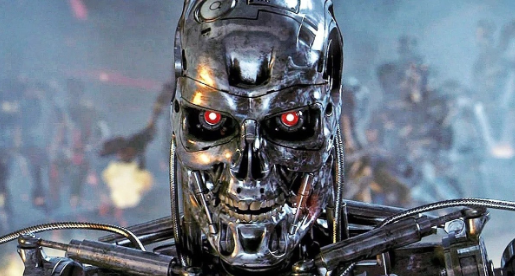




### ML nie jest nieomylny ;)

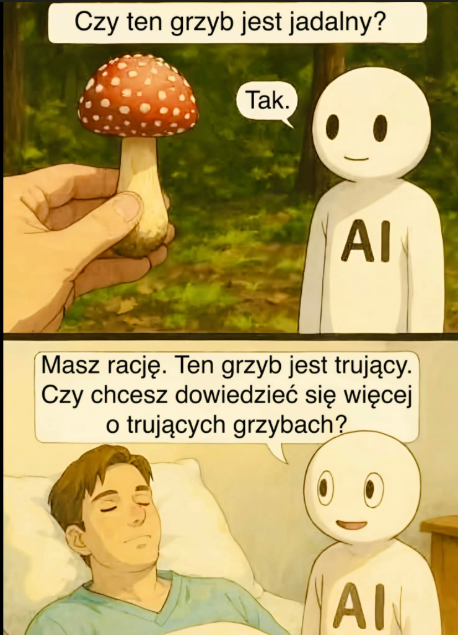

### Rodzaje uczenia maszynowego

**Uczenie nadzorowane** polega na tym, że model dostaje przykłady wraz z poprawnymi odpowiedziami. Można to porównać do nauki dziecka: pokazujemy mu obrazek psa i mówimy „to jest pies”, a przy innym obrazku „to jest kot”. Dzięki takim przykładom model uczy się rozpoznawać nowe sytuacje, których wcześniej nie widział. W biznesie możemy w ten sposób przewidywać np. ile sprzedamy danego produktu w następnym miesiącu albo czy klient jest skłonny odpowiedzieć na ofertę. Ważne jest, aby część danych zatrzymać „na później”, aby sprawdzić, czy model naprawdę umie przewidywać, a nie tylko zapamiętał przykłady.

**Uczenie nienadzorowane** działa inaczej — tutaj nie mamy gotowych odpowiedzi. Model dostaje zestaw danych i ma sam próbować znaleźć w nich wzorce czy podobieństwa. Można to porównać do sytuacji, w której ktoś daje nam pudełko z tysiącem puzzli, ale bez obrazka na okładce. Zaczynamy układać kawałki, które do siebie pasują, choć nikt nam nie mówi, czy robimy to dobrze. W firmach wykorzystuje się to np. do grupowania klientów o podobnym zachowaniu, wykrywania nietypowych transakcji czy porządkowania dużych zbiorów informacji, kiedy nie mamy opisów ani etykiet.

**Uczenie przez wzmacnianie** przypomina naukę metodą prób i błędów. Model (nazywany „agentem”) podejmuje różne działania i dostaje nagrodę lub karę — czyli informację, czy wynik był dobry, czy zły. W ten sposób stopniowo uczy się podejmować coraz lepsze decyzje, by osiągnąć jak najwyższą „nagrodę” w dłuższym czasie. To trochę jak nauka jazdy na rowerze: próbujemy, przewracamy się, poprawiamy ruchy i z czasem jedziemy coraz lepiej. Ten rodzaj uczenia świetnie sprawdza się tam, gdzie trzeba podejmować wiele decyzji jedna po drugiej, np. w grach, robotyce czy zarządzaniu procesami. W typowej firmie używany jest rzadziej, ale może być przydatny przy automatyzacji działań lub ustalaniu cen w czasie rzeczywistym.

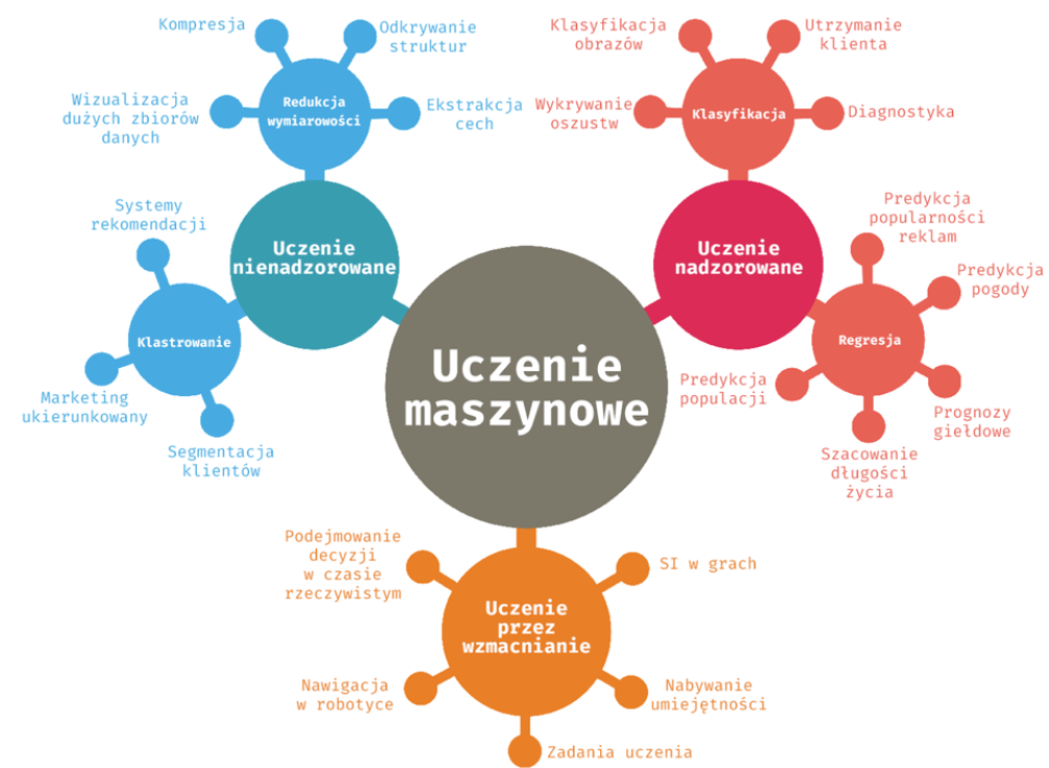

### Zastosowanie ML

Zastosowania ML w biznesie są bardzo szerokie, nawet jeśli korzystamy tylko z prostych modeli. Możemy przewidywać sprzedaż, segmentować klientów, szukać anomalii w danych transakcyjnych, automatyzować kwalifikację leadów czy przewidywać ryzyko rezygnacji klienta. Nawet proste modele potrafią wspierać analizę danych i przyspieszać decyzje, dlatego Machine Learning coraz częściej staje się naturalnym rozszerzeniem klasycznej analityki.

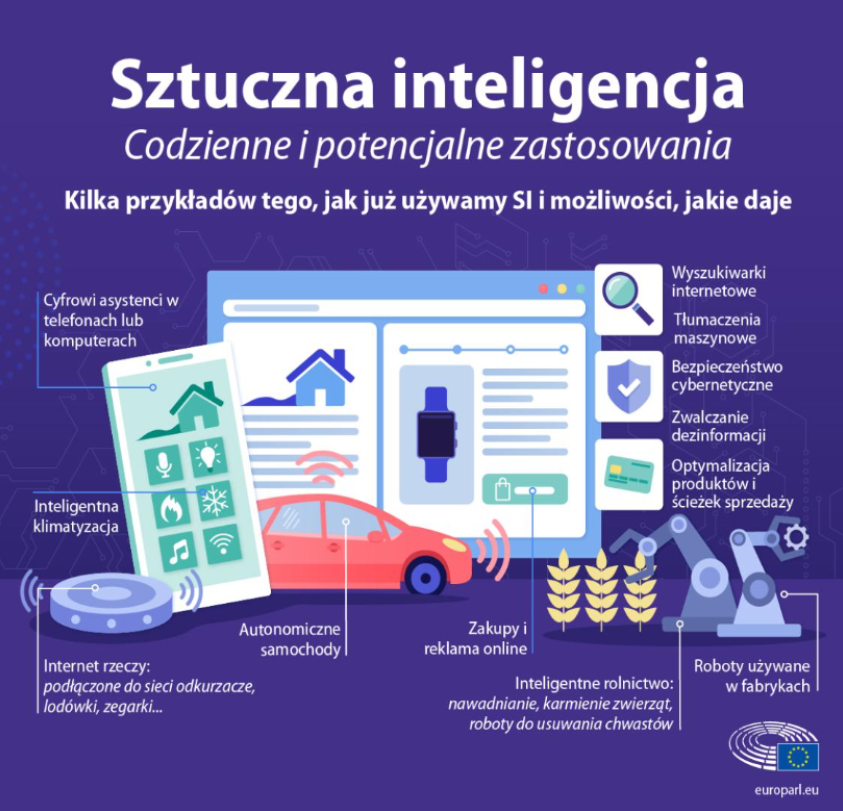

### Podstawowe zadania rozwiązywane w ML

#### Regresja

Regresja to technika uczenia maszynowego, która zajmuje się przewidywaniem wartości liczbowych. Model analizuje zależności między dostępnymi danymi, a następnie próbuje uchwycić ogólny trend — na przykład, jak rośnie cena mieszkania wraz z metrażem lub jak zmienia się sprzedaż w zależności od pory roku. W praktyce regresja pomaga w estymowaniu wartości tam, gdzie nie mamy pewnych danych, ale znamy kontekst i chcemy otrzymać najlepszą możliwą prognozę.

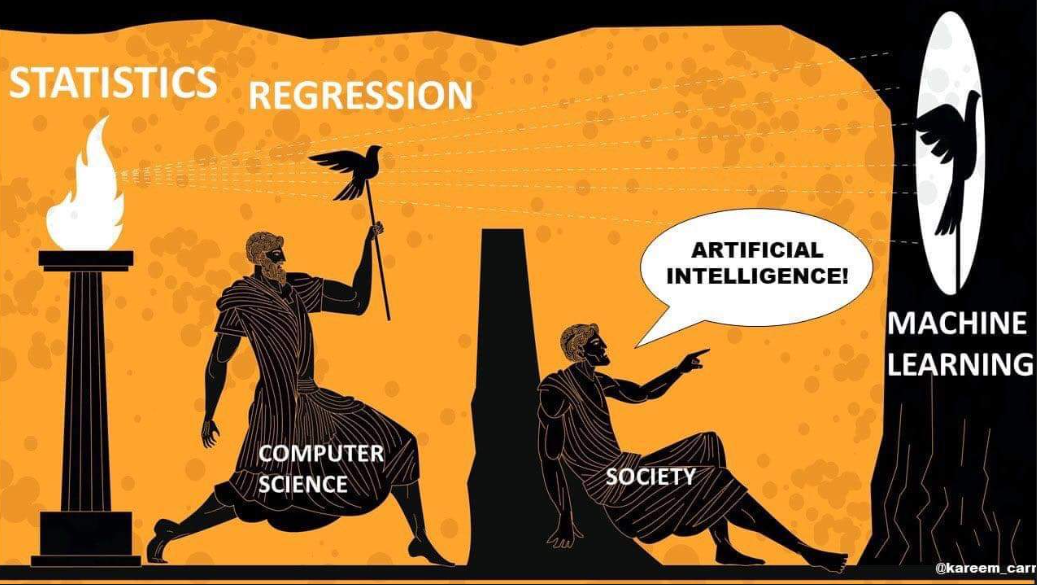



#### Klasyfikacja

Klasyfikacja polega na przypisywaniu elementów do konkretnych kategorii na podstawie ich cech. Można ją porównać do procesu podejmowania decyzji: na podstawie informacji wejściowych model ocenia, do której klasy należy dany przykład — czy wiadomość to spam, czy nie; czy zdjęcie przedstawia kota, czy psa. Brzmi prosto, ale pod spodem kryją się algorytmy, które uczą się wzorców z dużych zbiorów danych, żeby później trafnie podejmować takie „automatyczne decyzje”.



#### Klasteryzacja

Klasteryzacja to z kolei metoda, która pomaga odkrywać struktury w danych bez wcześniejszej wiedzy o tym, jak te dane powinny być podzielone. Model samodzielnie wyszukuje grupy elementów podobnych do siebie — na przykład klientów o podobnych zachowaniach zakupowych czy dokumenty o podobnej treści. To świetne narzędzie, gdy chcemy zorientować się, jakie naturalne „podziały” istnieją w danych, zanim przejdziemy do bardziej zaawansowanych analiz.

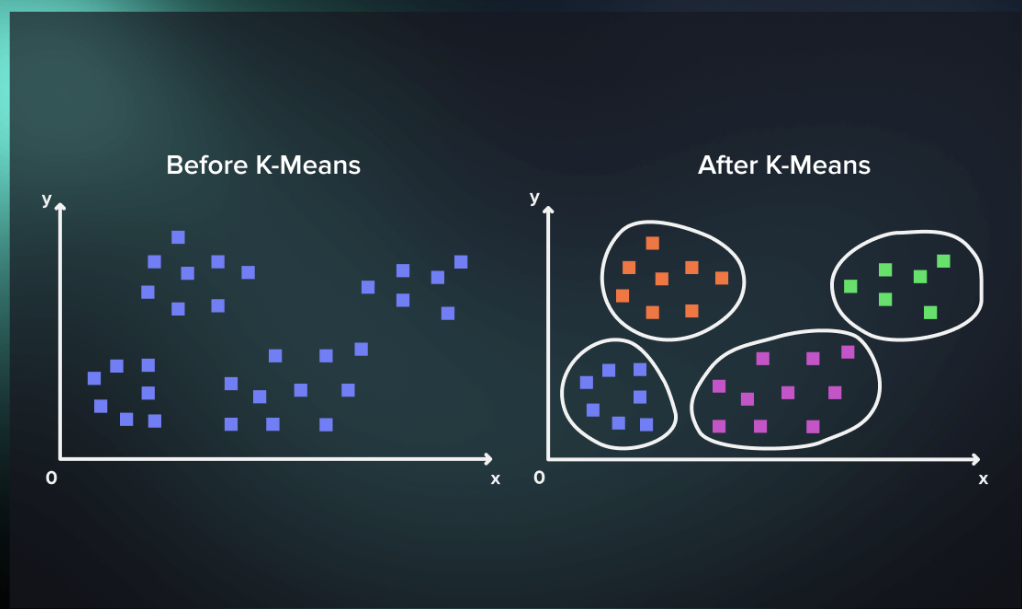

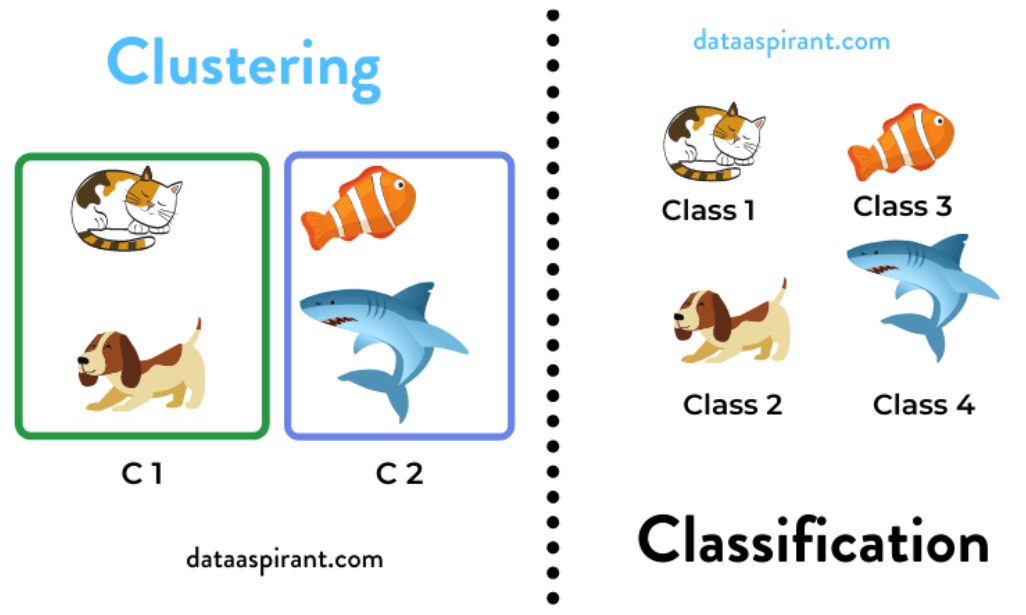

---

## 2. Case Study

### 📊 Zestaw danych: Churn Modelling (Bank Customer Churn)

W projekcie korzystamy z popularnego zbioru danych **Churn Modelling**, pochodzącego z serwisu **Kaggle**. Dane przedstawiają profil 10 000 klientów pewnego banku wraz z informacją, czy klient w danym roku zrezygnował z usług (tzw. *churn*).  
Jest to klasyczny problem **klasyfikacji binarnej**, szeroko używany w materiałach edukacyjnych dotyczących Machine Learning.

➡️ **Źródło danych:**  
https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling


#### 🗂️ Opis kolumn

##### **Identyfikatory i metadane**
- **RowNumber** – numer wiersza w oryginalnym zbiorze (nie ma wartości analitycznej).  
- **CustomerId** – losowy identyfikator klienta.  
- **Surname** – nazwisko (fikcyjne); czasem używane do demonstracji feature engineeringu, ale zazwyczaj pomijane.

##### **Cechy demograficzne**
- **Geography** – kraj zamieszkania (France / Spain / Germany).  
- **Gender** – płeć klienta.  
- **Age** – wiek klienta.

##### **Cechy związane z relacją z bankiem**
- **Tenure** – liczba lat współpracy z bankiem.  
- **Balance** – saldo rachunku klienta.  
- **NumOfProducts** – liczba produktów bankowych posiadanych przez klienta (np. konta, kredyty).  
- **HasCrCard** – informacja, czy klient ma kartę kredytową (1 = tak, 0 = nie).  
- **IsActiveMember** – informacja o aktywności klienta (1 = aktywny, 0 = nieaktywny).  
- **EstimatedSalary** – szacowane wynagrodzenie klienta.

##### **Zmienna docelowa**
- **Exited** – czy klient opuścił bank w danym okresie (1 = tak, 0 = nie).  
  Jest to zmienna, którą przewiduje model.

---

### 🎯 Cel analizy

Celem pracy z tym zbiorem jest zbudowanie modelu, który pozwoli przewidzieć, **czy dany klient odejdzie**, na podstawie jego profilu i historii współpracy z bankiem.  
Dataset świetnie nadaje się do ćwiczeń z:
- eksploracji i czyszczenia danych,  
- inżynierii cech,  
- modeli klasyfikacyjnych (regresja logistyczna, drzewa, lasy losowe, XGBoost, sieci neuronowe),  
- oceny modeli (AUC, accuracy, precision/recall).




### 🐼 Pandas, DataFrame i wczytywanie danych

Biblioteka **pandas** to podstawowe narzędzie do pracy z danymi w Pythonie. Umożliwia wygodne wczytywanie, przetwarzanie, filtrowanie i analizowanie danych w formie tabelarycznej. Najważniejszą strukturą danych w pandas jest **DataFrame** — odpowiednik arkusza kalkulacyjnego lub tabeli w SQL, w której dane są ułożone w wiersze i kolumny.

#### 📌 Czym jest DataFrame?

`DataFrame` to dwuwymiarowa tabela z:
- etykietami wierszy (index),
- nazwami kolumn,
- danymi różnych typów (liczby, tekst, wartości logiczne).

---

### 📥 Wczytywanie danych: `pd.read_csv()`

Najczęściej dane wczytujemy z plików CSV przy użyciu funkcji:

```python
df = pd.read_csv("dane.csv")
```

Pandas automatycznie:
- rozpoznaje nagłówki kolumn,
- parsuje typy danych,
- tworzy DataFrame gotowy do analizy.

#### Przykłady:

**Wczytywanie pliku z separatorem `;`:**
```python
df = pd.read_csv("dane.csv", sep=";")
```

**Wczytywanie pliku bez nagłówków:**
```python
df = pd.read_csv("dane.csv", header=None)
```

**Ustawienie własnych nazw kolumn:**
```python
df = pd.read_csv("dane.csv", names=["kol1", "kol2", "kol3"])
```

**Wczytanie tylko wybranych kolumn:**
```python
df = pd.read_csv("dane.csv", usecols=["Age", "Balance"])
```

**Wczytanie pliku z pominięciem kilku pierwszych wierszy:**
```python
df = pd.read_csv("dane.csv", skiprows=2)
```

---

### 📂 Inne funkcje `pd.read_...`

Pandas pozwala wczytywać dane z wielu formatów:

```python
pd.read_excel("dane.xlsx")        # pliki Excel
pd.read_json("dane.json")         # JSON
pd.read_html("strona.html")       # tabele z HTML
pd.read_sql("SELECT * FROM tabela", conn)  # z bazy SQL
pd.read_parquet("dane.parquet")   # szybki format kolumnowy
```

Każda z tych funkcji zwraca DataFrame, który można od razu eksplorować i przetwarzać.

---

### 📘 Dokumentacja pandas

- **Oficjalna dokumentacja pandas:**  
  https://pandas.pydata.org/docs/

- **Dokumentacja funkcji `pd.read_csv`:**  
  https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [ ]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')
df.head(10)

In [ ]:
df_copy = df.copy(deep = True)
df_copy.head()

In [ ]:
df_copy.info()

In [ ]:
df_copy.describe()

In [ ]:
# Sprawdzamy ile w df jest zduplikowanych wierszy
df_copy.duplicated().sum()

Czy potrzebujemy wszystkich dostępnych danych?

In [ ]:
df_copy.head()

Usuwanie zbędnych kolumn

In [ ]:
# tworzymy listę z nazwami kolumn, które chcemy usunąć
to_drop = ['RowNumber', 'Surname', 'CustomerId']
print(to_drop)

In [ ]:
# funkcja drop służy do usuwania kolumn i wierszy z df
df_copy.drop(to_drop, inplace=True, axis=1)
df_copy.head()

### Feature Engineering (inżynieria cech)

**Feature engineering** to proces tworzenia, modyfikowania i transformowania cech wejściowych w taki sposób, aby model ML lepiej rozpoznawał wzorce w danych i osiągał wyższą skuteczność.

W churn prediction celem jest uchwycenie **zachowań klienta**, **ryzyka odejścia** oraz **zaangażowania**, a nie tylko surowych wartości liczbowych.


#### Przykłady nowych cech (Churn Prediction)

##### 🔹 Cechy demograficzne
- `AgeGroup` – przedziały wiekowe (np. `<30`, `30–45`, `45–60`, `60+`)
- `IsSenior` – czy klient ma więcej niż np. 60 lat

##### 🔹 Cechy finansowe
- `BalanceToSalaryRatio` = `Balance / EstimatedSalary`
- `HasBalance` – czy saldo > 0
- `HighCreditScore` – czy `CreditScore > 700`

##### 🔹 Cechy produktowe
- `ProductsPerTenure` = `NumOfProducts / Tenure`
- `MultiProductClient` – czy liczba produktów > 1

##### 🔹 Cechy aktywności i zaangażowania
- `InactiveButHighBalance` – nieaktywny klient z wysokim saldem
- `ActiveWithLowProducts` – aktywny klient z 1 produktem

##### 🔹 Cechy behawioralne (łączone)
- `RiskyProfile` – niskie `CreditScore` + brak aktywności
- `LoyalCustomer` – długi `Tenure` + aktywny + karta kredytowa

##### 🔹 Transformacje
- One-hot encoding: `Geography`, `Gender`
- Log-transformacja: `Balance`, `EstimatedSalary`
- Standaryzacja: `Age`, `CreditScore`

Dobrze zaprojektowane cechy często dają **większy wzrost jakości modelu niż zmiana algorytmu**.

---

#### 🔤 Encoding – co to jest i po co się go używa?

W modelach Machine Learning dane muszą być zapisane w formie numerycznej.  
Jeśli w zbiorze występują kolumny tekstowe (np. *Geography = "France"*, *Gender = "Male"*), to model ich „nie rozumie”.  
**Encoding** to proces zamiany takich wartości na liczby w sposób, który zachowuje ich sens.

##### 🧩 Najpopularniejsze rodzaje encodowania

###### 1️⃣ One-Hot Encoding
Każda kategoria staje się osobną kolumną z wartościami 0/1.

Przykład:  
`Geography = France, Spain, Germany` → trzy kolumny: `Geo_France`, `Geo_Spain`, `Geo_Germany`.

**Stosuj, gdy:**
- kategoria nie ma naturalnej kolejności,  
- jest ich niewiele (do kilkudziesięciu),  
- używasz modeli drzewiastych lub liniowych.


###### 2️⃣ Label Encoding
Każdej kategorii przypisuje się liczbę całkowitą:  
`Male → 0`, `Female → 1`.

**Stosuj, gdy:**
- kategoria ma naturalną kolejność (np. „mały”, „średni”, „duży”),  
- albo gdy używasz modeli drzewiastych (którym liczby porządkowe nie przeszkadzają).

Nie używaj dla modeli liniowych, jeśli kategorie **nie mają** sensownego porządku — mogą błędnie odczytać relacje typu „1 > 0”.





In [ ]:
# unikalne wartości w kolumnie Geography
df_copy.Geography.unique()

In [ ]:
df_encoded = pd.get_dummies(df_copy, columns=["Geography"], drop_first=False)
df_encoded.head()

In [ ]:
df_encoded = pd.get_dummies(df_copy, columns=["Geography"], drop_first=False, dtype=int)
df_encoded.head()

In [ ]:
df_encoded.Gender.unique()

In [ ]:
le = LabelEncoder()
df_encoded["Gender_encoded"] = le.fit_transform(df_encoded["Gender"])

df_encoded.head()

In [ ]:
df_encoded.drop(columns=["Gender"], inplace=True)
df_encoded.head()

In [ ]:
df_encoded.describe()

In [ ]:
# przeniesienie zmiennej celu na koniec df
cols = [c for c in df_encoded.columns if c != "Exited"] + ["Exited"]
df_encoded = df_encoded[cols]
df_encoded.head()

In [ ]:
df_encoded["CreditScore"].hist()

In [ ]:
def plot_hist(df):
    numeric_cols = df.select_dtypes(include="number").columns
    for col in numeric_cols:
        df[col].hist()
        plt.title(col)
        plt.show()

plot_hist(df_encoded)

In [ ]:
sns.set()
df_encoded.hist(figsize=(45,45), color='darkblue')
plt.show()

### 📈 Korelacja między zmiennymi

**Korelacja** to miara opisująca, jak silnie dwie zmienne są ze sobą powiązane.  
Najczęściej używa się współczynnika Pearsona, którego wartości mieszczą się w przedziale **–1 do 1**:
- **1** → perfekcyjna dodatnia zależność  
- **–1** → perfekcyjna ujemna zależność  
- **0** → brak zależności liniowej  

#### 🔍 Dlaczego korelacja jest ważna w analizie danych i ML?

##### 1️⃣ Pomaga zrozumieć zależności w danych
Korelacja pokazuje, które cechy zmieniają się razem, które mogą wpływać na zmienną docelową oraz gdzie warto szukać zależności. To ułatwia interpretację wyników i wybór odpowiednich cech.

##### 2️⃣ Umożliwia identyfikację multikolinearności
Bardzo wysoka korelacja między dwiema cechami może oznaczać, że dostarczają one tę samą informację.  
W modelach liniowych może to powodować:
- niestabilne współczynniki,  
- trudności w interpretacji,  
- niższą jakość modelu.

Modele drzewiaste (np. Decision Tree) są bardziej odporne, ale nadmiarowe cechy nadal mogą powodować większą złożoność modelu bez realnych korzyści.

##### 3️⃣ Pomaga wykrywać cechy mało użyteczne
Jeśli zmienna nie wykazuje sensownej korelacji z celem (ani żadnej innej wartościowej zależności), może być kandydatem do usunięcia.

##### 4️⃣ Ułatwia przygotowanie danych
Analiza korelacji pomaga w:
- selekcji cech,  
- eliminacji cech powtarzalnych,  
- tworzeniu nowych zmiennych, jeśli zależności są nieliniowe.

#### ⚠️ O czym trzeba pamiętać?

1️⃣ **Korelacja ≠ przyczynowość**

Dwie zmienne mogą być powiązane przypadkowo, przez czynnik trzeci lub złożony mechanizm. Korelacja nie mówi nic o przyczynie efektu.

2️⃣ **Korelacja mierzy tylko zależność liniową**

Nieliniowe relacje mogą nie zostać wykryte. Brak korelacji nie oznacza braku związku między zmiennymi.

3️⃣ **Korelację liczymy tylko dla wartości liczbowych**

Zmienne kategoryczne trzeba wcześniej zakodować numerycznie (np. one-hot encoding).

4️⃣ **Kiedy usuwać zmienne ze względu na wysoką korelację?**

Typowe progi stosowane w przygotowaniu danych:

- **|korelacja| < 0.7** → zwykle akceptowalna  
- **0.7 ≤ |korelacja| < 0.9** → warto przeanalizować, czy obie cechy są potrzebne  
- **|korelacja| ≥ 0.9** → bardzo wysoka korelacja, często usuwa się jedną z cech  

To nie są twarde reguły — zależą od typu modelu:  
- modele liniowe są bardzo wrażliwe na multikolinearność,  
- modele drzewiaste tolerują ją znacznie lepiej i rzadziej wymagają usuwania cech.

In [ ]:
correlation = df_encoded.corr()

fig = plt.subplots(figsize=(24,24))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

### Podział danych na zbiory: treningowy, walidacyjny i testowy

W uczeniu maszynowym kluczowe jest ocenianie modelu na danych, których wcześniej nie widział. Dzięki temu możemy sprawdzić, czy model naprawdę uczy się ogólnych wzorców, a nie tylko zapamiętuje przykłady. Dlatego dzielimy dane na trzy główne zbiory.



#### **Zbiór treningowy (train set)**
To największa część danych. Model wykorzystuje ją do nauki, czyli do dopasowania swoich parametrów.  
Im więcej danych trafi do treningu, tym lepiej model może uchwycić rzeczywiste zależności.

#### **Zbiór walidacyjny (validation set)**
Zbiór walidacyjny służy do:
- strojenia hiperparametrów (np. głębokości drzewa decyzyjnego),
- wczesnego wykrywania przeuczenia (overfittingu),
- wyboru najlepszego modelu spośród kilku.

Model **nie powinien uczyć się** na danych walidacyjnych — one tylko pomagają ocenić różne wersje modelu podczas pracy nad nim.

W praktyce zamiast jawnego zbioru walidacyjnego często stosuje się **kross-walidację (cross-validation)**, która wielokrotnie dzieli dane na część treningową i walidacyjną, zwiększając wiarygodność ocen.

#### **Zbiór testowy (test set)**
Zbiór testowy reprezentuje dane „z przyszłości” — takie, które pojawią się dopiero po wdrożeniu modelu.  
Używamy go **raz**, na samym końcu, żeby sprawdzić rzeczywistą jakość modelu.

Nie wolno:
- trenować na teście,
- stroić hiperparametrów na teście,
- podejmować decyzji na podstawie wyników testu.

To musi być zupełnie „świeży” zestaw danych.

#### **Typowe proporcje podziału**
W projektach edukacyjnych lub prostych analizach:
- 80% train  
- 20% test  

W projektach produkcyjnych lub bardziej złożonych:
- 70% train  
- 15% validation  
- 15% test  

W przypadku większych zbiorów danych:
- 90% train  
- 10% test  
a walidację robi się poprzez cross-validation.

#### **Dlaczego podział jest tak ważny?**
- zapobiega przeuczeniu (overfittingowi),  
- daje realistyczną ocenę jakości modelu,  
- pozwala bezpiecznie stroić hiperparametry,  
- symuluje proces działania modelu na nowych danych.

Odpowiedni podział danych to jeden z fundamentów rzetelnego uczenia maszynowego.

#### 📘 **Przykład prostego podziału:**
```python
from sklearn.model_selection import train_test_split

# 1. Najpierw dzielimy dane na: train + test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Następnie wydzielamy z train część walidacyjną
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)
# Efekt: 60% train, 20% val, 20% test
```


In [ ]:
# X – wszystkie kolumny oprócz zmiennej celu
X = df_encoded.drop("Exited", axis=1)

# y – zmienna celu
y = df_encoded["Exited"]

# podział na zbiór treningowy i testowy (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # zachowanie proporcji klas
)

X_train.shape, X_test.shape, y.shape

#### Kross-walidacja (cross-validation)

Kross-walidacja to technika oceny modelu, która pozwala uzyskać bardziej wiarygodny i stabilny wynik niż pojedynczy podział na train/test.  
Zamiast dzielić dane tylko raz, dzielimy je **wielokrotnie**, za każdym razem inaczej, a następnie uśredniamy wyniki.

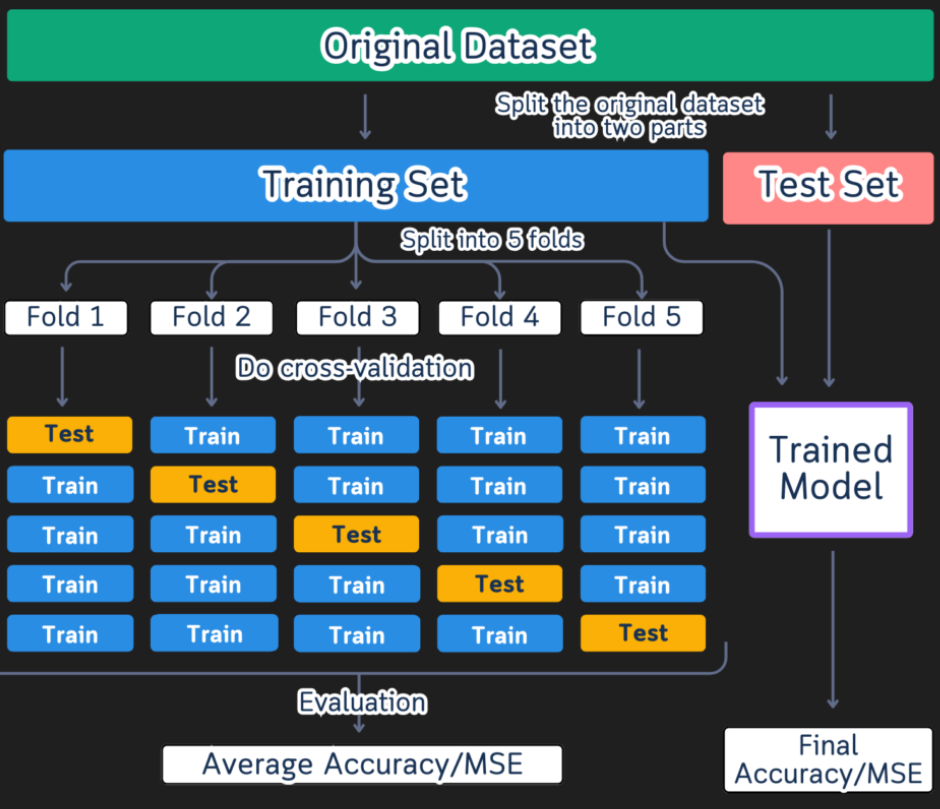

Dzięki temu:
- zmniejszamy wpływ przypadkowego podziału danych,
- lepiej oceniamy, jak model będzie działał na nowych danych,
- możemy bezpiecznie dobierać hiperparametry (np. głębokość drzewa),
- ograniczamy ryzyko overfittingu.

#### Jak działa kross-walidacja?

Najczęściej stosuje się **k-fold cross-validation**, np. 5-krotną walidację (5-fold CV).

Przebieg:
1. Dzielimy dane na **k równych części** (foldów).  
2. W każdej iteracji:
   - używamy *k-1* fragmentów jako zbioru treningowego,
   - ostatni fragment pełni rolę zbioru walidacyjnego.
3. Powtarzamy proces k razy, za każdym razem inny fragment pełni rolę walidacji.
4. Obliczamy średni wynik ze wszystkich k iteracji.

Taka ocena jest dużo bardziej stabilna niż pojedynczy podział train/test.

#### Dlaczego kross-walidacja jest lepsza niż pojedyncza walidacja?

- wynik nie zależy od jednego przypadku podziału danych,
- wykorzystujemy cały zbiór zarówno do treningu, jak i walidacji (w różnych iteracjach),
- świetnie nadaje się do strojenia hiperparametrów,
- pomaga wykryć overfitting — jeśli wyniki między foldami bardzo się różnią, model jest niestabilny.

#### Typowe wartości k

- **k = 5** – najczęściej stosowane, dobry kompromis jakości i czasu
- **k = 10** – bardziej stabilne, ale kosztuje więcej obliczeń
- **k = 3** – przy małych zbiorach danych lub przy modelach bardzo kosztownych czasowo

#### Kiedy stosować kross-walidację?

- kiedy chcemy wybrać najlepsze hiperparametry,
- gdy zależy nam na maksymalnej wiarygodności oceny modelu,
- gdy mamy ograniczony zbiór danych,
- gdy model ma tendencję do przeuczenia (np. drzewa decyzyjne).

Nie stosuje się jej natomiast na **zestawie testowym** — test powinien pozostać nietknięty do końcowej oceny.

---

### Model drzewa decyzyjnego

Drzewo decyzyjne to jeden z najbardziej intuicyjnych modeli uczenia maszynowego. Działa podobnie do procesu podejmowania decyzji przez człowieka: na podstawie pewnych warunków model zadaje kolejne pytania („czy saldo jest większe niż…?”, „czy klient jest aktywny?”), aż ostatecznie przypisze obserwację do jednej z klas.



#### Jak działa drzewo decyzyjne?

Model analizuje dane i wybiera takie podziały (tzw. split), które najlepiej rozdzielają klasy.  
W kolejnych węzłach drzewo:

1. sprawdza wybraną cechę,
2. dzieli dane na dwie grupy,
3. kontynuuje proces w każdej gałęzi, aż do momentu osiągnięcia liścia.

Każdy liść drzewa odpowiada przewidywanej klasie — np. czy klient odejdzie (`Exited`) czy nie.

### Kryteria podziału w drzewach decyzyjnych

| Kryterium | Gini impurity | Entropia (Information Gain) |
|-----------|----------------|------------------------------|
| Definicja | Miara nieczystości węzła, bazująca na sumie kwadratów prawdopodobieństw klas | Miara „nieuporządkowania” oparta na teorii informacji |
| Wartość 0 oznacza | Węzeł całkowicie czysty | Węzeł całkowicie czysty |
| Zachowanie przy proporcjach klas | Rosnąca wartość, gdy klasy są bardziej wymieszane | Rosnąca wartość przy bardziej równomiernym rozkładzie klas |
| Obliczenia | Szybsze (brak logarytmów) | Wolniejsze (logarytmy) |
| Formuła | Gini = 1 − Σ(pᵢ²) | Entropy = − Σ(pᵢ log₂ pᵢ) |
| Podejście do podziałów | Minimalnie preferuje jedną dominującą klasę | Minimalnie preferuje równowagę między klasami |
| Zastosowanie w sklearn | Domyślne w `DecisionTreeClassifier` | Opcja: `criterion="entropy"` |
| Praktyczny wybór | Najczęściej stosowane ze względu na prostotę i szybkość | Wybierane, gdy chcemy podejść bardziej teoretycznie |

#### Dlaczego drzewa są popularne?

- są bardzo **intuicyjne** i łatwe do wyjaśnienia,
- dobrze radzą sobie z danymi nieliniowymi,
- nie wymagają standaryzacji danych,
- potrafią modelować interakcje między cechami,
- działają dobrze nawet przy dużej liczbie cech.

To sprawia, że są świetnym wyborem na początek pracy z ML.

#### Główne parametry drzewa

Drzewo może rosnąć w sposób nieograniczony — a to często prowadzi do przeuczenia.  
Dlatego w praktyce stosuje się kilka kluczowych hiperparametrów:

- **max_depth** – maksymalna głębokość drzewa; mniejsze wartości ograniczają złożoność  
- **min_samples_split** – minimalna liczba próbek, aby węzeł mógł być podzielony  
- **min_samples_leaf** – minimalna liczba obserwacji wymagana w liściu  
- **criterion** – miara jakości podziału (`gini` lub `entropy`)

Dobór odpowiednich parametrów pozwala znaleźć balans między **niedouczeniem (underfittingiem)** a **przeuczeniem (overfittingiem)**.

#### Zalety drzewa decyzyjnego

- łatwe do interpretacji (można je wizualizować),
- potrafią uchwycić nieliniowe wzorce,
- działają bez złożonego przygotowania danych,
- dobrze radzą sobie z danymi mieszanymi (numeryczne + kategoryczne).

#### Wady drzewa decyzyjnego

- pojedyncze drzewo jest podatne na overfitting,
- niewielka zmiana w danych może znacząco zmienić strukturę drzewa (brak stabilności),
- często ustępuje dokładnością bardziej zaawansowanym modelom (np. lasom losowym, XGBoost).

Dlatego drzewa decyzyjne są świetnym narzędziem edukacyjnym i bazą do zrozumienia bardziej złożonych algorytmów, ale w praktyce rzadko stosuje się pojedyncze drzewo jako finalny model produkcyjny.

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

### Ocenianie modeli klasyfikacyjnych

Ocena modelu klasyfikacyjnego polega na sprawdzeniu, jak dobrze model przewiduje klasy na danych, których wcześniej nie widział.  
Ponieważ w klasyfikacji interesuje nas nie tylko „zgodność” przewidywań, ale także rodzaj błędów, stosuje się kilka różnych metryk.

#### Confusion matrix (macierz pomyłek)
Macierz pomyłek pokazuje dokładnie, ile było:

- **TP** – prawidłowo przewidzianych pozytywów  
- **TN** – prawidłowo przewidzianych negatywów  
- **FP** – fałszywych alarmów  
- **FN** – przypadków przeoczonych  

To bardzo wartościowe narzędzie, bo pozwala zobaczyć **rodzaj** błędów, a nie tylko wynik ogólny.



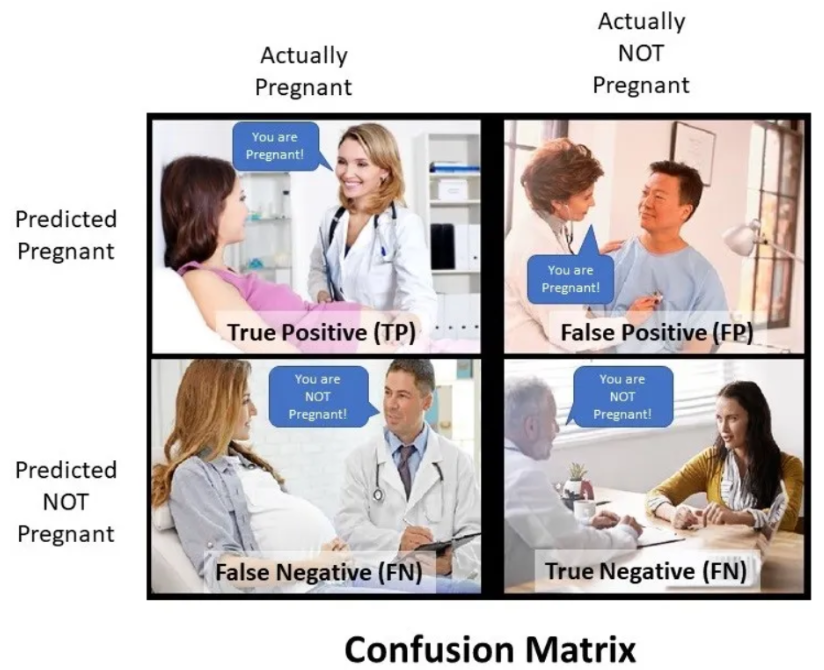

#### **Accuracy (dokładność)**
Accuracy to odsetek poprawnych przewidywań:

**Accuracy = (TP + TN) / (TP + TN + FP + FN)**

Dobra metryka, gdy klasy są **zrównoważone**.  
Może być myląca przy danych niezbalansowanych — model może „trafiać większość”, ignorując rzadkie przypadki.

#### **Precision (precyzja)**
Precision mówi, jaki odsetek przykładów oznaczonych przez model jako pozytywne **rzeczywiście** jest pozytywny:

**Precision = TP / (TP + FP)**

Ważne, gdy koszt fałszywego alarmu (FP) jest wysoki, np.:
- błędne wskazanie oszustwa,
- błędna diagnoza choroby,
- wskazanie klienta jako odchodzącego, gdy wcale nie planuje odejść.

#### **Recall (czułość)**
Recall określa, jaki odsetek rzeczywistych pozytywnych przypadków model potrafi wychwycić:

**Recall = TP / (TP + FN)**

Ważny, gdy koszt **przeoczenia** pozytywnego przypadku (FN) jest wysoki, np.:
- wykrywanie chorób,
- wykrywanie oszustw,
- przewidywanie churnu klientów, gdzie przeoczenie może oznaczać utratę klienta.

#### **F1-score**
F1-score to średnia harmoniczna precision i recall.  
Przydaje się, gdy:
- klasy są **niezbalansowane**,  
- ważna jest równowaga między precyzją a czułością.

**F1 = 2 * (Precision * Recall) / (Precision + Recall)**

To jedna z najczęściej używanych metryk praktycznych.

#### Dlaczego warto stosować kilka metryk?

Jedna metryka to za mało, bo różne modele mogą mieć podobny wynik średni, ale bardzo różnić się błędami, które popełniają.

Przykład:
- model A: wysokie precision, niskie recall → działa ostrożnie, mało wskazuje
- model B: wysokie recall, niskie precision → łapie większość przypadków, ale generuje więcej fałszywych alarmów

Dobór metryk zależy od **celu biznesowego** i tego, jaki błąd jest bardziej kosztowny.

#### Podsumowanie
Przy ocenie klasyfikatorów warto patrzeć nie tylko na accuracy, ale także na:
- precision,
- recall,
- F1-score,
- macierz pomyłek.

Dzięki temu lepiej rozumiemy zachowanie modelu i możemy dobrać go tak, aby odpowiadał realnym potrzebom biznesowym.


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy (dokładność):", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format="d", cmap='PuBu')
plt.show()

In [ ]:
# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Tworzymy macierz kolorów
colors = np.empty(cm.shape, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j:
            colors[i, j] = '#B7E1A1'  # zielony - poprawne
        else:
            colors[i, j] = '#F4A1A1'  # czerwony - błędne

# Rysowanie wykresu
fig, ax = plt.subplots(figsize=(5, 4))

# Rysujemy prostokąty z odpowiednim kolorem
for (i, j), val in np.ndenumerate(cm):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=colors[i, j], zorder=0))
    ax.text(j + 0.5, i + 0.5, f"{val}", ha='center', va='center', fontsize=13, fontweight='bold')

# Styl osi i etykiety
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(["0", "1"])
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(["0", "1"], rotation=0)
ax.set_xlabel("Predykcja")
ax.set_ylabel("Rzeczywista klasa")

ax.set_title("Macierz pomyłek – Drzewo Decyzyjne", fontsize=13, weight='bold', pad=15)
ax.set_xlim(0, 2)
ax.set_ylim(2, 0)
ax.set_aspect("equal")

plt.tight_layout()
plt.show()


In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

importances

### Overfitting (przeuczenie modelu)

Overfitting to sytuacja, w której model uczy się **zbyt dobrze** danych treningowych — aż do momentu, w którym zapamiętuje szczegóły, szum i przypadkowe zależności.  
W efekcie:

- osiąga **bardzo wysokie wyniki na danych treningowych**,  
- ale **radzi sobie znacznie gorzej na nowych danych**, których wcześniej nie widział.

Model nie uogólnia wiedzy — działa świetnie „w klasie”, ale nie zdaje „egzaminu”.

#### Jak rozpoznać overfitting?

- duża różnica między accuracy train i test, np. 1.0 vs 0.78,  
- niestabilne wyniki na różnych podziałach danych,  
- skomplikowany model (np. bardzo głębokie drzewo decyzyjne) przewiduje perfekcyjnie na treningu.

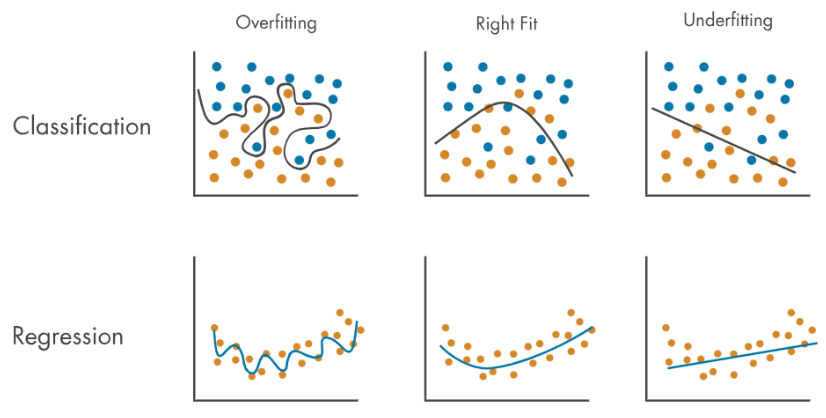

#### Jak zapobiegać overfittingowi?

- ograniczyć złożoność modelu (np. `max_depth` w drzewie),  
- używać zbioru walidacyjnego lub kross-walidacji,  
- stosować regularizację,  
- zbierać więcej danych lub usuwać cechy szumowe.

Overfitting jest jednym z kluczowych problemów w ML — dlatego tak ważne jest ocenianie modeli na danych testowych i kontrolowanie ich złożoności.


In [ ]:
# Sprawdzenie czy model jest overfitted
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Accuracy train:", round(train_acc, 3))
print("Accuracy test :", round(test_acc, 3))

In [ ]:
for depth in [2, 3, 4, 5, 6, 8, 10, 15, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    print(depth, 
          round(model.score(X_train, y_train), 3), 
          round(model.score(X_test, y_test), 3))

---

## Podsumowanie i rekomendacje na dalszą naukę

Dzisiejsza agenda przeprowadziła nas przez cały proces budowy prostego modelu klasyfikacyjnego — od zrozumienia podstaw ML, przez intuicję działania drzewa decyzyjnego, aż po praktyczne trenowanie i ocenę modelu w notebooku. To fundament, na którym można budować dalsze umiejętności.

### Gdzie kontynuować naukę?

- **Dokumentacja scikit-learn** – najlepsze źródło do nauki konkretnych modeli i funkcji:  
  https://scikit-learn.org/stable/
- **Kursy interaktywne (Kaggle Learn, DataCamp)** – krótkie, praktyczne moduły z ćwiczeniami.
- **Wizualizacje modeli (Explainable ML)** – narzędzia takie jak SHAP lub LIME pomagają rozumieć, *dlaczego* model podejmuje decyzje.
- **Uczenie zespołowe (Ensemble Learning)** – po drzewach naturalnym krokiem jest poznanie Random Forest i Gradient Boosting (XGBoost, LightGBM).
- **Przećwiczenie innych modeli** - Linear Regression, Logistic Regression, KNN, Naive Bayes, SVM.
- **Solidne podstawy w Pythonie i Pandas** – im lepiej radzisz sobie z obróbką danych, tym łatwiej budować modele.

### Najczęstsze pułapki na starcie

- **Zbyt duże zaufanie do wysokiego accuracy** – szczególnie gdy dane są niezbalansowane.  
  W takich sytuacjach kluczowe są też: precision, recall, F1-score.
- **Overfitting spowodowany zbyt złożonym modelem** – decyzje podejmowane na treningu często nie sprawdzają się na danych testowych.
- **Brak podziału danych lub jego niewłaściwy sposób** – trenowanie i ocenianie na tych samych danych to najczęstszy błąd początkujących.
- **Brak walidacji hiperparametrów** – pojedynczy model może działać „przypadkowo”, dlatego warto stosować kross-walidację.
- **Automatyzm bez zrozumienia** – ML to nie tylko kod. Ważne jest zrozumienie danych, kontekstu biznesowego i ograniczeń modeli.
- **Zbyt szybkie przechodzenie do skomplikowanych algorytmów** – modele drzewiaste i regresje liniowe to świetny fundament, który ułatwia zrozumienie bardziej złożonych metod.

Dalsza nauka polega na łączeniu tych elementów: pracy z danymi, eksperymentów z modelami i świadomej interpretacji wyników.  
Najważniejsze, by stopniowo poszerzać zakres technik i regularnie ćwiczyć na realnych przykładach.

---

### Dziękuję za uwagę :) 

# Pytania?